<a href="https://colab.research.google.com/github/Volkner90/3DCreator/blob/main/Intro_nn_iteso_Jonathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 899915949451994927
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8487095849108059869
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


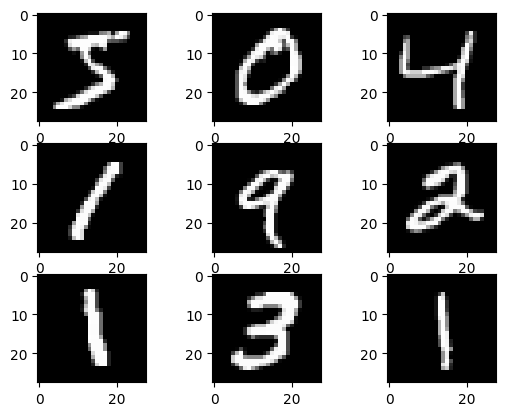

In [3]:
from matplotlib import pyplot
import numpy as np

for i in range(0,9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap="gray")

pyplot.show()

# Preprocessing

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
type(y_train)

numpy.ndarray

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [7]:
# number of labels
num_labels = len(np.unique(y_train))
print("num labels: ", num_labels)

num labels:  10


In [8]:
y_train[0]

5

In [9]:
y_train = to_categorical(y_train)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_test = to_categorical(y_test)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
image_size = X_train.shape[1]
image_size

28

In [13]:
image_size = image_size * image_size
image_size

784

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train = np.reshape(X_train, [-1, image_size])
X_train.shape

(60000, 784)

In [16]:
X_train = X_train.astype("float32") / 255
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
X_test = np.reshape(X_test, [-1, image_size])
X_test = X_test.astype("float32") / 255


In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

# Model - MLP

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

In [20]:
model = Sequential(name="MLP")

# size of neurons in the hidden layer
hidden_units = 20 # more units
dropout = .4 # more or less dropout

# Layer 1
model.add(Dense(hidden_units, input_dim = image_size, activation = "relu")) # tanh, sigmod
model.add(Dropout(dropout)) # regularization

# Layer 2
model.add(Dense(hidden_units, activation = "relu"))
model.add(Dropout(dropout)) # regularization

# Layer output
model.add(Dense(num_labels)) # output layer
model.add(Activation("softmax"))

model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 K

In [21]:
# compile
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam", # Adam
    metrics = ["accuracy"]
)

In [22]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split = .1,
    epochs = 38, # more epochs
    batch_size = 128
)

Epoch 1/38
422/422 [==============================] - 10s 5ms/step - loss: 1.4248 - accuracy: 0.4909 - val_loss: 0.5117 - val_accuracy: 0.8995
Epoch 2/38
422/422 [==============================] - 2s 5ms/step - loss: 0.9340 - accuracy: 0.6783 - val_loss: 0.3507 - val_accuracy: 0.9185
Epoch 3/38
422/422 [==============================] - 2s 5ms/step - loss: 0.8305 - accuracy: 0.7176 - val_loss: 0.3118 - val_accuracy: 0.9248
Epoch 4/38
422/422 [==============================] - 2s 4ms/step - loss: 0.7763 - accuracy: 0.7369 - val_loss: 0.2932 - val_accuracy: 0.9242
Epoch 5/38
422/422 [==============================] - 2s 5ms/step - loss: 0.7456 - accuracy: 0.7474 - val_loss: 0.2918 - val_accuracy: 0.9265
Epoch 6/38
422/422 [==============================] - 2s 4ms/step - loss: 0.7291 - accuracy: 0.7539 - val_loss: 0.2726 - val_accuracy: 0.9288
Epoch 7/38
422/422 [==============================] - 2s 4ms/step - loss: 0.7135 - accuracy: 0.7581 - val_loss: 0.2615 - val_accuracy: 0.9295
Epoch

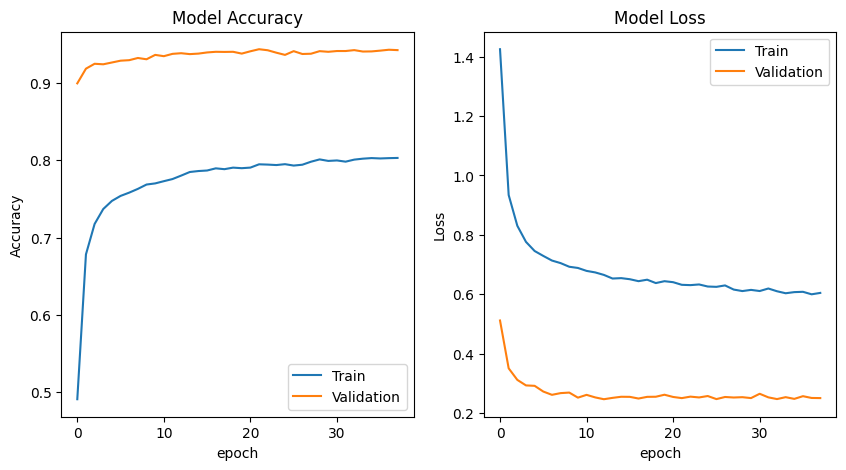

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc = "best")

plt.subplot(122)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc = "best")

# Testing

In [24]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size = 128
)

print("Test accuracy: ", acc)

79/79 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9335
Test accuracy:  0.9334999918937683


# Actividad
Un modelo de por lo menos 98% en el test